### Egress time distributions.
### Tests for peak or off peak hour

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from time import time
from matplotlib.figure import Figure
from tqdm import tqdm
from fitter import Fitter, get_common_distributions
from math import sqrt
from matplotlib import axes, pyplot
from sigfig import round
import scipy.stats
from statistics import mean, stdev
from yaml import dump

In [4]:
DB_PATH = "/home/justine/Cired/Data/AFC_AVL_2020_02/RERA_202002_test.db"

In [5]:
from f2b.preprocessing.station_egress_time_fitter import Data

In [6]:
def plot_distributions_and_estimations(
    axs: axes.Axes,
    plot_position: list,
    egress_times_by_station: dict,
    fitted_laws: dict,
    station_origin: str,
    best_law_info: dict,
) -> None:
    "Plot the observed distribution and the estimated law of egress times in each station."

    colors_4am = ["#2a225d", "#c83576", "#ffbe7d", "#e9f98f", "#eaf7ff"]

    plot_row = plot_position[0]
    plot_column = plot_position[1]
    axs[plot_row, plot_column].hist(
        egress_times_by_station[station_origin], bins=300, color=colors_4am[0]
    )
    axs[plot_row, plot_column].axis(ymin=0, ymax=30)
    axs[plot_row, plot_column].set_title("from "+ station_origin + " to " + "VIN")

    ax2 = axs[plot_row, plot_column].twinx()
    egress_times_by_station[station_origin].sort()

    for law in best_law_info.keys():
        fitted_distrib = law
        fitted_distrib_function = eval("scipy.stats." + law)

    ax2label = fitted_distrib + "\n"
    mean, var = fitted_distrib_function.stats(**best_law_info[fitted_distrib], moments = 'mv')
    ax2label += "mean: " + str(mean)[0:4] + "\n std: " + str(sqrt(var))[0:4]
    ax2.plot(
        egress_times_by_station[station_origin],
        fitted_distrib_function.pdf(
            egress_times_by_station[station_origin],
            **best_law_info[fitted_distrib],
        ),
        color=colors_4am[1],
        label=ax2label,
    )
    ax2.axis(ymin=0, ymax=0.02)
    pyplot.legend(loc="upper right")
    pyplot.xlim([0, 300])

In [15]:
dates = ["05/02/2020", "06/02/2020", "07/02/2020"]
stations = ["NAT", "DEF"]

#### Trips with only one feasible run !!

In [14]:
result_output_writing = {}

station_origin = stations[0]
station_estimation = stations[1]

data = Data(station_estimation, dates, [station_origin], False)

egress_time_morning_peak = []
egress_time_afternoon_peak = []
egress_time_off_peak = []
print(len(data.trips))
for pos, trip_id in enumerate(data.trips.index):
    trip_egress_time = data.trips.at[trip_id, "egress_time"]
    if trip_egress_time > "07:45:00" and trip_egress_time < "09:45:00":
        egress_time_morning_peak.append(data.egress_times[pos])
    if trip_egress_time > "17:00:00" and trip_egress_time < "20:00:00":
        egress_time_afternoon_peak.append(data.egress_times[pos])
    else:
        egress_time_off_peak.append(data.egress_times[pos])

print(
    f"Morning peak: {len(egress_time_morning_peak)} egress_times, average = {mean(egress_time_morning_peak)}, standard deviation = {stdev(egress_time_morning_peak)}.\n"
)
print(
    f"Afternoon peak: {len(egress_time_afternoon_peak)} egress_times, average = {mean(egress_time_afternoon_peak)}, standard deviation = {stdev(egress_time_afternoon_peak)}.\n"
)
print(
    f"Off peak: {len(egress_time_off_peak)} egress_times, average = {mean(egress_time_off_peak)}, standard deviation = {stdev(egress_time_off_peak)}.\n"
)


3784
Morning peak: 1167 egress_times, average = 128.41902313624678, standard deviation = 67.62047312512568.

Afternoon peak: 450 egress_times, average = 83.59555555555555, standard deviation = 23.613366374088876.

Off peak: 3334 egress_times, average = 105.89112177564488, standard deviation = 53.077691804543434.



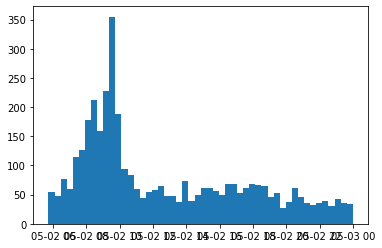

In [11]:
from pandas import Timestamp

pyplot.rcParams['figure.figsize'] = [15, 7]

tap_in_times = [
    Timestamp(str(dates[0] + " " + egress_time))
    for egress_time in data.trips["egress_time"]
]
pyplot.hist(tap_in_times, bins = 50)
pyplot.show()